In [89]:
import numpy as np
from util import *
from decentralized import plot_solve
import matplotlib.pyplot as plt

In [90]:
from decentralized import random_setup,pos_mask


In [114]:
n_agents = 10
n_states = 6


In [115]:
x_dims = [n_states]*n_agents

In [116]:
data= np.load('10_drones_distributed_sim_data.npy')

In [117]:
data.shape

(52, 60)

In [118]:
plot_solve?

Signature: plot_solve(X, J, x_goal, x_dims=None, color_agents=False, n_d=2)
Docstring: Plot the resultant trajectory on plt.gcf()
File:      /mnt/c/Users/Randy666/Documents/projects/ICON_lab/decentralized/decentralized/util.py
Type:      function


In [119]:
x0,xf = paper_setup_10_quads()

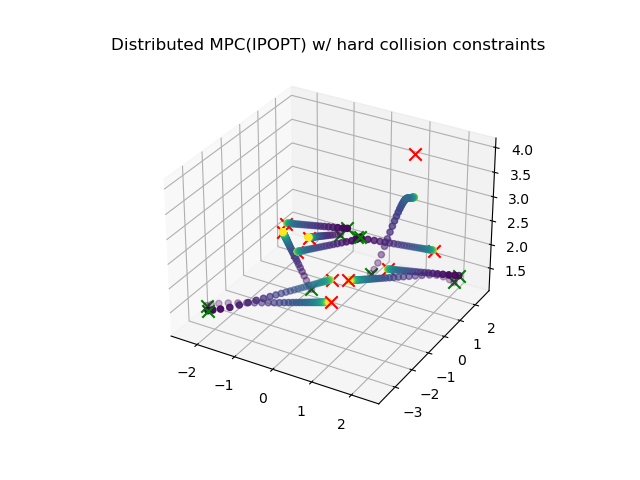

In [121]:
%matplotlib ipympl
plt.figure(dpi=100)
plot_solve(data,1899.39,xf,x_dims=[6,6,6,6,6,6,6,6,6,6],n_d=3)
plt.title('Distributed MPC(IPOPT) w/ hard collision constraints');

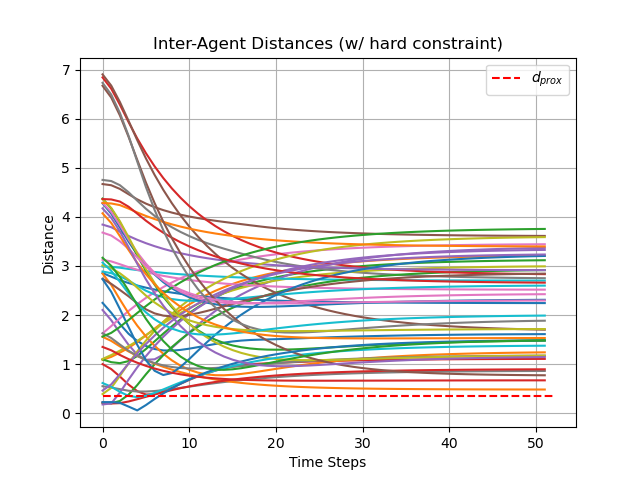

In [136]:
plt.figure()
plt.plot(compute_pairwise_distance(data,x_dims));
plt.hlines(0.35, 0, data.shape[0], 'r', ls='--', label="$d_{prox}$")
plt.title("Inter-Agent Distances (w/ hard constraint)")
plt.xlabel("Time Steps")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.draw()

### Distributed MPC with collision costs instead of constraints:

In [129]:
data_soft = np.load('10_drones_distributed_sim_data(soft_constraint).npy')

In [130]:
n_agents = 10
n_states = 6
x_dims = [n_states]*n_agents


In [131]:
data_soft.shape

(77, 60)

In [132]:
x0,xf = paper_setup_10_quads()

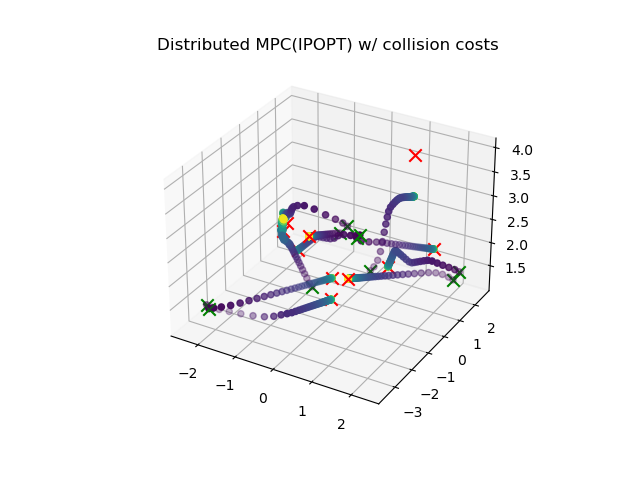

In [135]:
%matplotlib ipympl
plt.figure(dpi=100)
plot_solve(data_soft,2606.853,xf,x_dims=[6,6,6,6,6,6,6,6,6,6],n_d=3);
plt.title('Distributed MPC(IPOPT) w/ collision costs');

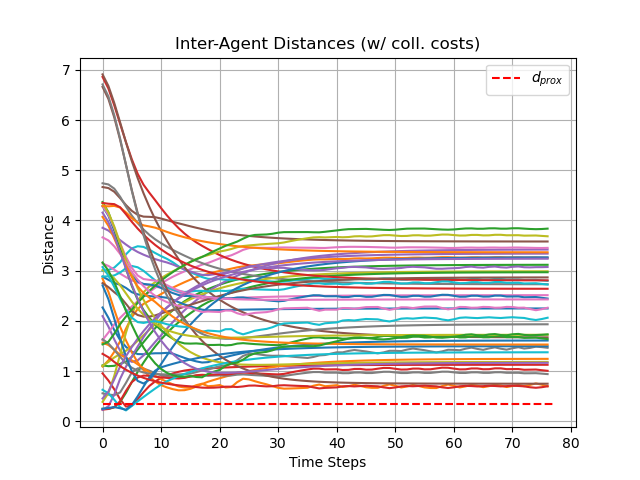

In [138]:
plt.figure()
plt.plot(compute_pairwise_distance(data_soft,x_dims));
plt.hlines(0.35, 0, data_soft.shape[0], 'r', ls='--', label="$d_{prox}$")
plt.title("Inter-Agent Distances (w/ coll. costs)")
plt.xlabel("Time Steps")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.draw()